In [32]:
%reload_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
from sklearn.model_selection import train_test_split
import network
# import cupy as cp

ImportError: CuPy is not correctly installed.

If you are using wheel distribution (cupy-cudaXX), make sure that the version of CuPy you installed matches with the version of CUDA on your host.
Also, confirm that only one CuPy package is installed:
  $ pip freeze

If you are building CuPy from source, please check your environment, uninstall CuPy and reinstall it with:
  $ pip install cupy --no-cache-dir -vvvv

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

original error: DLL load failed while importing runtime: The specified procedure could not be found.

In [2]:
df = pd.read_csv("../samples/A_Z Handwritten Data.csv")

In [7]:
image_size = 28

def vec2img(v):
    index = v[0]
    img = np.array(v[1:]).reshape(image_size, image_size)
    plt.imshow(img)
    plt.show()
    return chr(index + 97), img

In [51]:
parent_dir = "C:\\github\\deep-scratch\\samples\\english"

index = 1
lastc = None

for _, row in df.iterrows():
    c, img = vec2img(row)
    if c!= lastc:
        index = 1
    try:
        os.mkdir(os.path.join(parent_dir, c))
    except:
        pass
    
    path = os.path.join(parent_dir, c, f"{index}.jpg")
    matplotlib.image.imsave(path, img, cmap='gray')
    index += 1
    lastc = c

In [3]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for c in range(26):
    train, test = train_test_split(df[df['0'] == c], test_size=0.2, shuffle=True)
    df_train = df_train.append(train, ignore_index=True)
    df_test = df_test.append(test, ignore_index=True)
    
del df

In [4]:
X_train = df_train[df_train.columns[1:]]
X_train.shape

(297950, 784)

In [5]:
y_train = df_train[df_train.columns[0]].values.astype(np.int32)
y_train = np.array([np.array([0] * i + [1] + [0] * (25 - i)) for i in y_train])
y_train.shape

del df_train

In [10]:
model = network.Network(inputDim=image_size ** 2, intializationScheme='glorot-uniform')
model.addLayer(dim = 300, activation='sigmoid')
model.addLayer(dim = 26, activation='softmax')
model.compile(loss='cat-crossentropy', optimizer='gd', batch_type="mbgd", batch_size=500)

Epoch 1: calculated loss = 0.335336652173 | calculated accuracy = 0.94365
Epoch 2: calculated loss = 0.315861748102 | calculated accuracy = 0.93793
Epoch 3: calculated loss = 0.255364688702 | calculated accuracy = 0.94248
Epoch 4: calculated loss = 0.218561296761 | calculated accuracy = 0.94689
Epoch 5: calculated loss = 0.200177250346 | calculated accuracy = 0.94988
Epoch 6: calculated loss = 0.182790887254 | calculated accuracy = 0.95422
Epoch 7: calculated loss = 0.177722094519 | calculated accuracy = 0.95454
Epoch 8: calculated loss = 0.167753977265 | calculated accuracy = 0.95672
Epoch 9: calculated loss = 0.159697375915 | calculated accuracy = 0.95847
Epoch 10: calculated loss = 0.158048140008 | calculated accuracy = 0.95855
Epoch 11: calculated loss = 0.154320415496 | calculated accuracy = 0.95966
Epoch 12: calculated loss = 0.152803338145 | calculated accuracy = 0.95968
Epoch 13: calculated loss = 0.148700906239 | calculated accuracy = 0.96079
Epoch 14: calculated loss = 0.1466

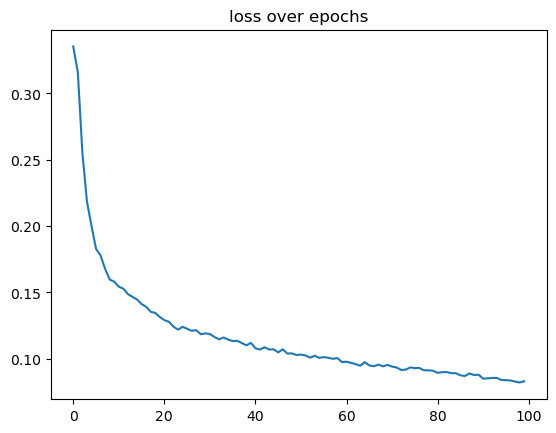

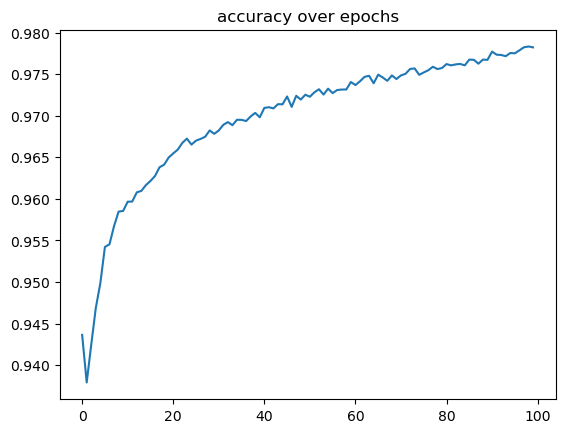

In [11]:
model.train(X_train.T, y_train.T, alpha=0.05, epochs = 100)
del X_train
del y_train

In [12]:
X_test = df_test[df_test.columns[1:]]
X_test.shape

(74500, 784)

In [13]:
y_test = df_test[df_test.columns[0]].values.astype(np.int32)
y_test = np.array([np.array([0] * i + [1] + [0] * (25 - i)) for i in y_test])
y_test.shape

del df_test

In [34]:
pred, cf, accuracy = model.predict(X_test.T, y_test.T)
print(f"testing accuracy on mnist testing dataset: {100 * accuracy:.2f}%")

testing accuracy on mnist testing dataset: 77.09%


In [25]:
d = pd.DataFrame()
d["actual"] = np.where(y_test == 1)[1]
v = []
for p in pred.T:
    if 1 in p:
        v.append(np.where(p == 1)[0][0])
    else:
        v.append(-1)
d["predicted"] = np.array(v).astype(np.int)

In [26]:
d

,actual,predicted
0,0,-1
1,0,0
2,0,17
3,0,0
4,0,-1
...,...,...
74495,25,25
74496,25,25
74497,25,25
74498,25,25


In [ ]:
model.flushnn()